# Análisis del conjunto diabetic

In [19]:
library(survival)

In [20]:
data(diabetic)

In [21]:
diabetic

id,laser,age,eye,trt,risk,time,status
5,argon,28,left,0,9,46.23,0
5,argon,28,right,1,9,46.23,0
14,xenon,12,left,1,8,42.50,0
14,xenon,12,right,0,6,31.30,1
16,xenon,9,left,1,11,42.27,0
16,xenon,9,right,0,11,42.27,0
25,xenon,9,left,0,11,20.60,0
25,xenon,9,right,1,11,20.60,0
29,xenon,13,left,0,10,0.30,1
29,xenon,13,right,1,9,38.77,0


## Falla definida como pérdida de vision==1

**Descrptiva**

In [27]:
sum(is.na(diabetic))

[1] 0

**Conteo bajo ciertas categorías**

In [28]:
sum(diabetic$eye=="left" & diabetic$laser=="xenon")

[1] 114

**Promedios**

In [29]:
mean(diabetic$time[diabetic$status==1 & diabetic$laser=="xenon"])

[1] 17.83126

**Gráficas**

In [30]:
laser<-factor(diabetic$laser, labels=c("xenon", "argon"))

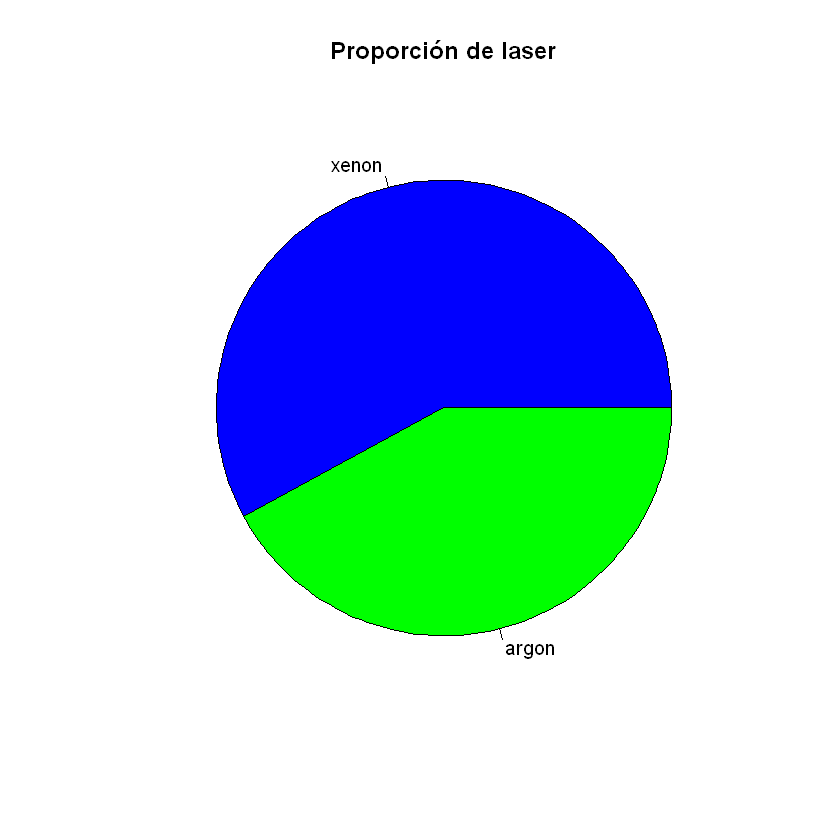

In [31]:
pie(table(laser), col=c("blue", "green"), main="Proporción de laser")

*Boxplot comparativo para dispersión de tiempos por laser*

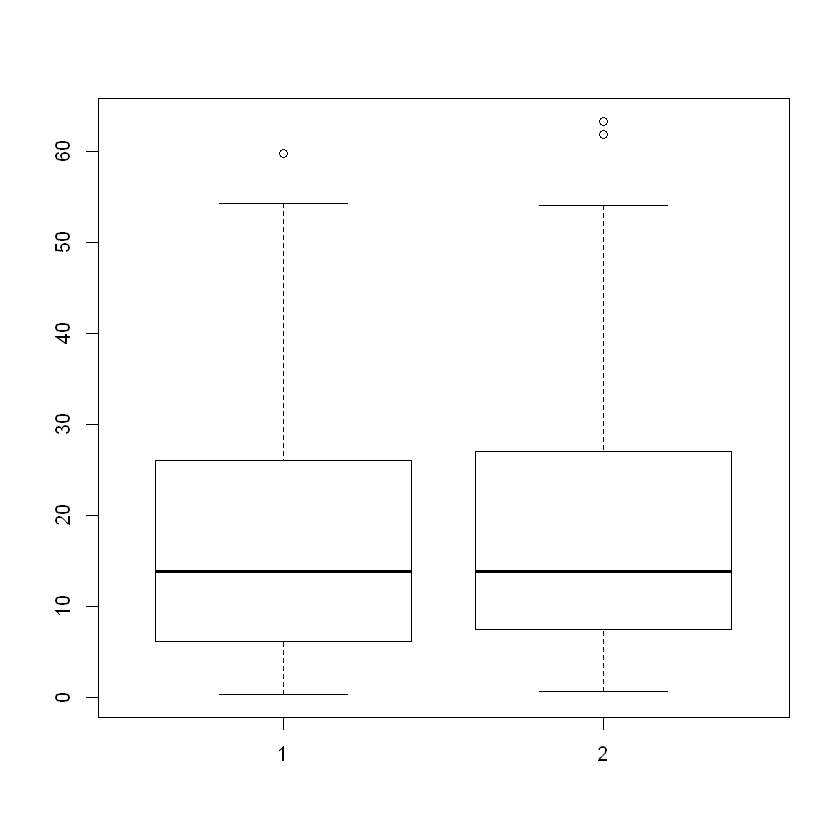

In [32]:
boxplot(diabetic$time[diabetic$status==1 & diabetic$laser=="xenon"], 
        diabetic$time[diabetic$status==1 & diabetic$laser=="argon"])

## Objeto surv

In [34]:
r.dia<-Surv(diabetic$time, diabetic$status)

In [35]:
summary(r.dia~diabetic$id+diabetic$laser+diabetic$age+diabetic$eye+diabetic$trt+diabetic$risk)

 Length   Class    Mode 
      3 formula    call 

In [36]:
cox2<-coxph(r.dia~diabetic$id+diabetic$eye+diabetic$trt+diabetic$risk)
summary(cox2)

Call:
coxph(formula = r.dia ~ diabetic$id + diabetic$eye + diabetic$trt + 
    diabetic$risk)

  n= 394, number of events= 155 

                        coef  exp(coef)   se(coef)      z Pr(>|z|)    
diabetic$id       -0.0003824  0.9996176  0.0001637 -2.337   0.0194 *  
diabetic$eyeright  0.3376084  1.4015916  0.1628860  2.073   0.0382 *  
diabetic$trt      -0.8260376  0.4377805  0.1698888 -4.862 1.16e-06 ***
diabetic$risk      0.1421855  1.1527904  0.0554172  2.566   0.0103 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

                  exp(coef) exp(-coef) lower .95 upper .95
diabetic$id          0.9996     1.0004    0.9993    0.9999
diabetic$eyeright    1.4016     0.7135    1.0185    1.9287
diabetic$trt         0.4378     2.2842    0.3138    0.6108
diabetic$risk        1.1528     0.8675    1.0341    1.2851

Concordance= 0.646  (se = 0.023 )
Likelihood ratio test= 39.39  on 4 df,   p=6e-08
Wald test            = 37.98  on 4 df,   p=1e-07
Score (logrank) test

**Residuales**

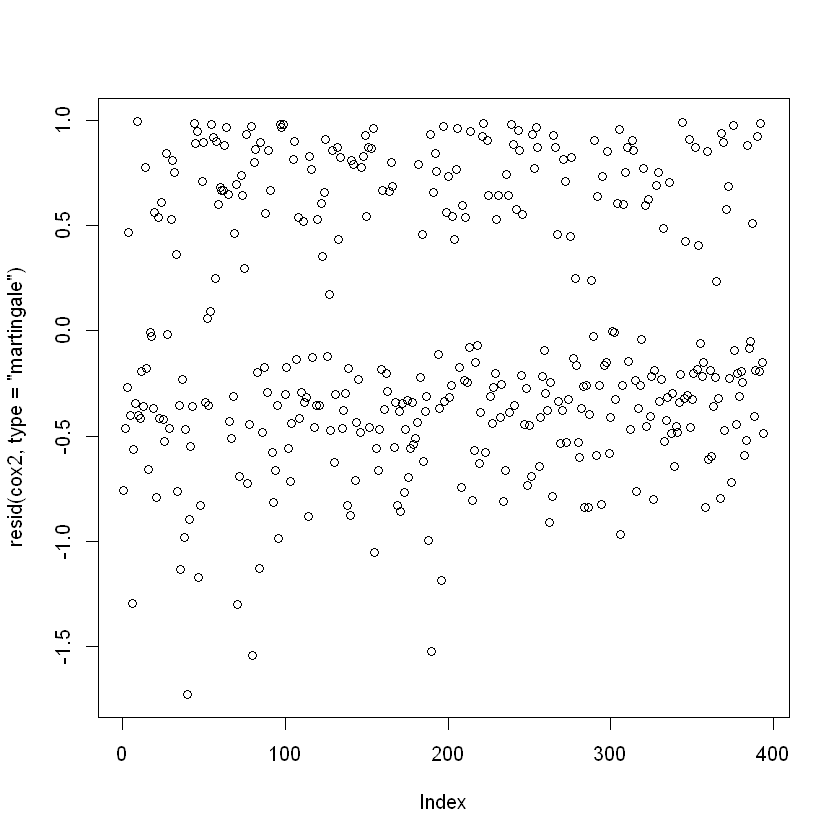

In [37]:
plot(resid(cox2, type="martingale"))

In [38]:
desv.dia<-resid(cox2, type="deviance")

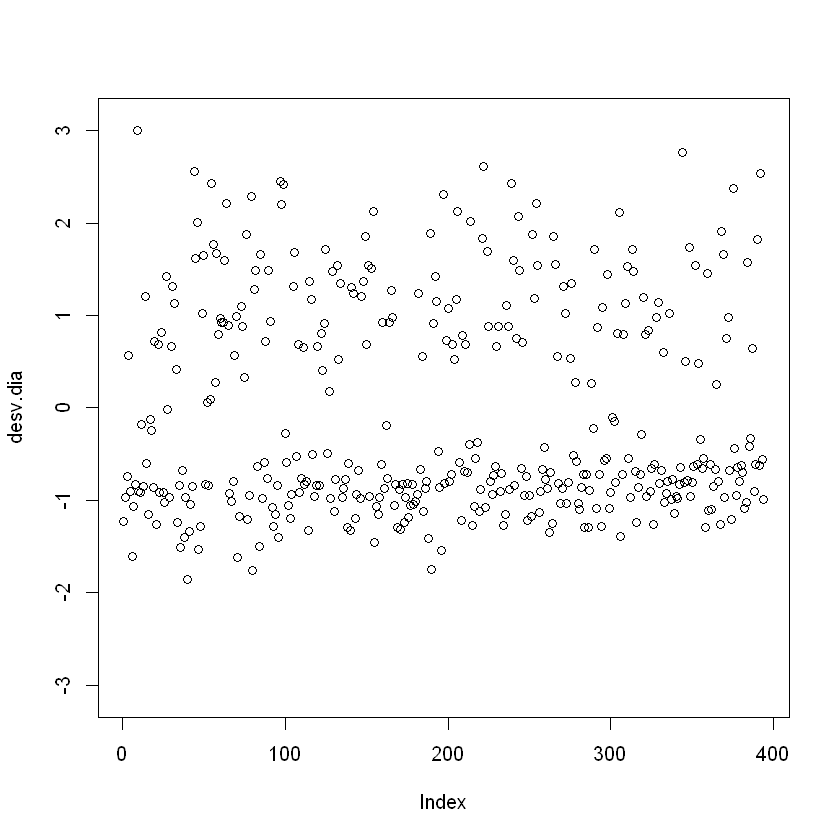

In [39]:
plot(desv.dia, ylim=c(-3.1, 3.1))

In [40]:
abline(h=c(-3,3), col="purple")

ERROR: Error in int_abline(a = a, b = b, h = h, v = v, untf = untf, ...): plot.new has not been called yet


In [41]:
desv.dia[desv.dia>3]#detectamos la obs 9 como atipico

9 
3.001199

**Retomando sin la obs 9**

In [42]:
dia2<-diabetic[-9,]

In [43]:
resp.sin9<-Surv(dia2$time, dia2$status)

In [44]:
cox2.sin9<-coxph(resp.sin9~dia2$id + dia2$eye +dia2$trt +dia2$risk)

In [45]:
summary(cox2.sin9)

Call:
coxph(formula = resp.sin9 ~ dia2$id + dia2$eye + dia2$trt + dia2$risk)

  n= 393, number of events= 154 

                    coef  exp(coef)   se(coef)      z Pr(>|z|)    
dia2$id       -0.0003616  0.9996385  0.0001640 -2.205   0.0275 *  
dia2$eyeright  0.3522808  1.4223079  0.1635440  2.154   0.0312 *  
dia2$trt      -0.8183882  0.4411421  0.1701834 -4.809 1.52e-06 ***
dia2$risk      0.1419463  1.1525148  0.0555980  2.553   0.0107 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

              exp(coef) exp(-coef) lower .95 upper .95
dia2$id          0.9996     1.0004    0.9993    1.0000
dia2$eyeright    1.4223     0.7031    1.0322    1.9598
dia2$trt         0.4411     2.2668    0.3160    0.6158
dia2$risk        1.1525     0.8677    1.0335    1.2852

Concordance= 0.643  (se = 0.023 )
Likelihood ratio test= 38.46  on 4 df,   p=9e-08
Wald test            = 37.11  on 4 df,   p=2e-07
Score (logrank) test = 37.84  on 4 df,   p=1e-07
